In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from google.colab import files
import io

In [ ]:
uploaded = files.upload()

Saving adult.data.csv to adult.data.csv
Saving adult.test.csv to adult.test.csv


# Câu 1

In [ ]:
train_data = pd.read_csv("adult.data.csv")
print(f"Number of training data: {len(train_data)}")
test_data = pd.read_csv("adult.test.csv")
print(f"Number of test data: {len(test_data)}")

print("Võ Thành Hoàng Phúc - 6351071056")

Number of training data: 32561
Number of test data: 16281
Võ Thành Hoàng Phúc - 6351071056


# Câu 2

In [ ]:
train_data = pd.read_csv("adult.data.csv")
test_data  = pd.read_csv("adult.test.csv")

train_data = train_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
test_data  = test_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

train_data = train_data.replace("?", np.nan)
test_data  = test_data.replace("?", np.nan)

train_data = train_data.dropna()
test_data = test_data.dropna()

# Xóa cột fnlwgt
train_data = train_data.drop(columns=['fnlwgt'])

# Gộp dữ liệu
data = pd.concat([train_data, test_data], ignore_index=True)

data.info()

print("Võ Thành Hoàng Phúc - 6351071056")

/tmp/ipython-input-2165908069.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_data = train_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
/tmp/ipython-input-2165908069.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_data  = test_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   sex             45222 non-null  object
 9   capital-gain    45222 non-null  int64 
 10  capital-loss    45222 non-null  int64 
 11  hours-per-week  45222 non-null  int64 
 12  native-country  45222 non-null  object
 13  income          45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB
Võ Thành Hoàng Phúc - 6351071056


# Câu 3

=== Pearson Correlation Matrix ===
                     age  education-num  capital-gain  capital-loss  \
age             1.000000       0.037623      0.079683      0.059351   
education-num   0.037623       1.000000      0.126907      0.081711   
capital-gain    0.079683       0.126907      1.000000     -0.032102   
capital-loss    0.059351       0.081711     -0.032102      1.000000   
hours-per-week  0.101992       0.146206      0.083880      0.054195   

                hours-per-week  
age                   0.101992  
education-num         0.146206  
capital-gain          0.083880  
capital-loss          0.054195  
hours-per-week        1.000000  


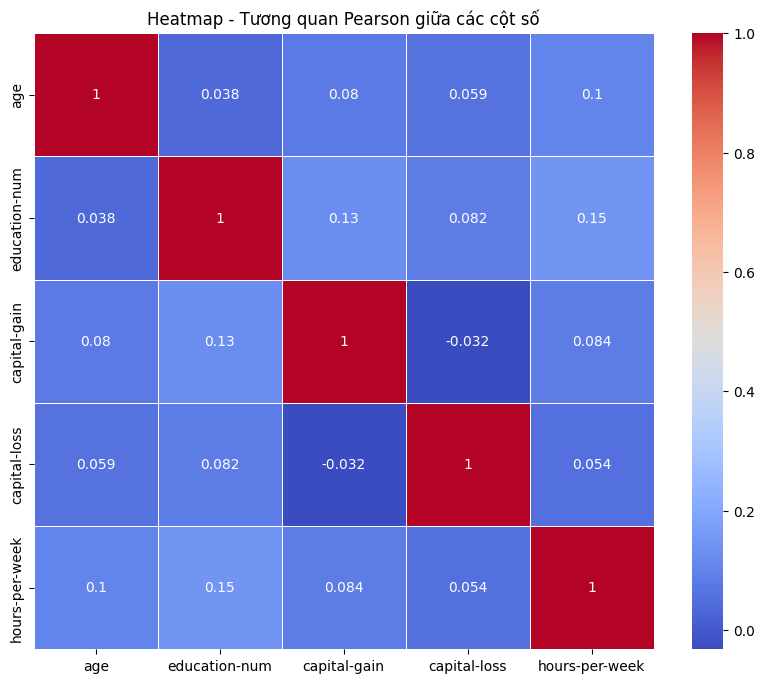

Võ Thành Hoàng Phúc - 6351071056


In [ ]:
# 1. Lọc các cột dạng số để tính Pearson
numeric_cols = data.select_dtypes(include=['int64', 'float64'])

# 2. Tính ma trận tương quan Pearson
corr_matrix = numeric_cols.corr(method='pearson')

print("=== Pearson Correlation Matrix ===")
print(corr_matrix)

# 3. Vẽ heatmap bằng seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap - Tương quan Pearson giữa các cột số")
plt.show()

print("Võ Thành Hoàng Phúc - 6351071056")

# Câu 4

In [ ]:
# Tách cột quyết định (Income) ra biến labels
labels = data['income']

# Tách phần còn lại làm features
features = data.drop(columns=['income'])

# Kiểm tra kết quả
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

print("\nFeatures columns:")
print(features.columns)

print("\nLabel samples:")
print(labels.head())

print("Võ Thành Hoàng Phúc - 6351071056")

Features shape: (45222, 13)
Labels shape: (45222,)

Features columns:
Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

Label samples:
0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object
Võ Thành Hoàng Phúc - 6351071056


# Câu 5

In [ ]:
features.select_dtypes(exclude=['int64']).columns
print("Võ Thành Hoàng Phúc - 6351071056")

Võ Thành Hoàng Phúc - 6351071056


In [ ]:
# Chuyển các cột dạng object sang one-hot vector
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
print("Võ Thành Hoàng Phúc - 6351071056")

Võ Thành Hoàng Phúc - 6351071056


In [ ]:
features_onehot


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,2174,0,40,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,13,0,0,13,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,38,9,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,7,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,13,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,13,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
45218,39,13,0,0,36,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
45219,38,13,0,0,50,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
45220,44,13,5455,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


# Câu 6

In [ ]:
X_train = features_onehot[:30162]
X_test = features_onehot[30162:]
y_train = labels[:30162]
y_test = labels[30162:]

print("Võ Thành Hoàng Phúc - 6351071056")

Võ Thành Hoàng Phúc - 6351071056


# Câu 7

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
#Train Decision Tree Classifer
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predict the response for test dataset
tree_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

print("Võ Thành Hoàng Phúc - 6351071056")

Accuracy: 0.8175298804780876
Report:               precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88     11360
        >50K       0.63      0.62      0.62      3700

    accuracy                           0.82     15060
   macro avg       0.75      0.75      0.75     15060
weighted avg       0.82      0.82      0.82     15060

Võ Thành Hoàng Phúc - 6351071056


Võ Thành Hoàng Phúc - 6351071056


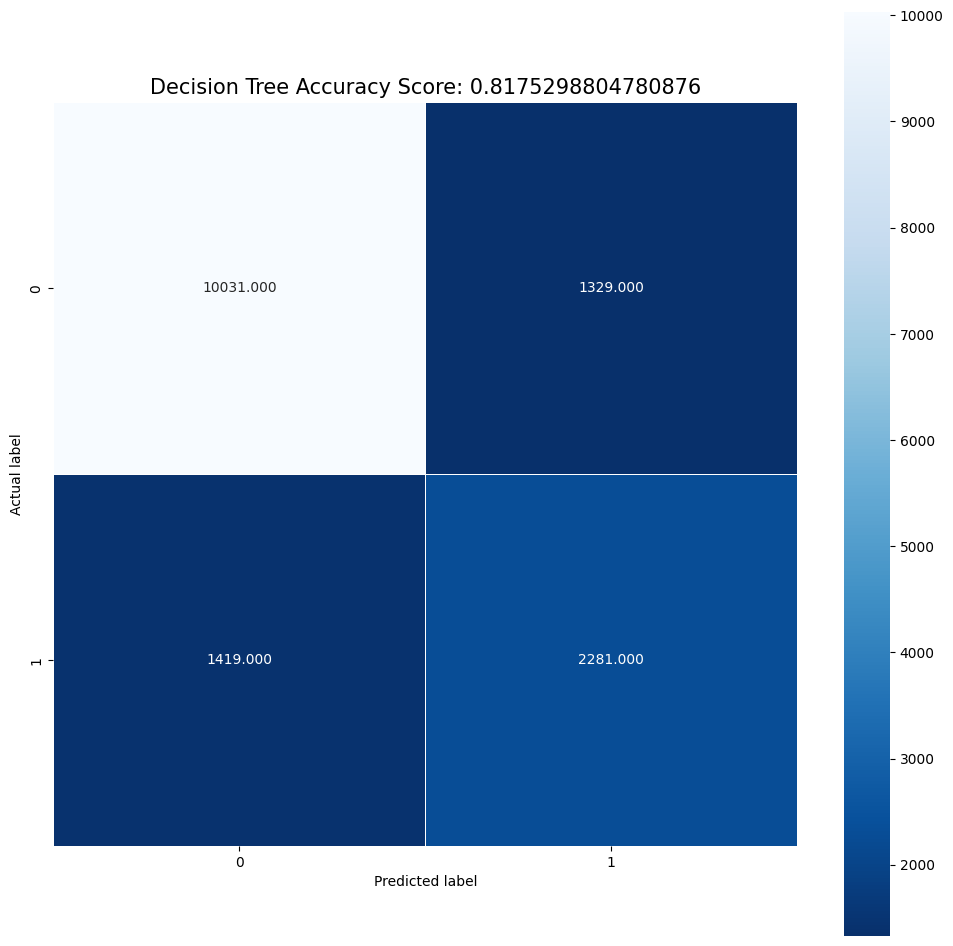

In [ ]:
# Tính toán ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

# Và biểu diễn nó lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size = 15);

print("Võ Thành Hoàng Phúc - 6351071056")

# Câu 8

In [ ]:
clf = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
#Train Decision Tree Classifer
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
#Predict the response for test dataset
cart_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
cart_score = metrics.accuracy_score(y_test, cart_pred)
print("Accuracy:", cart_score)
print("Report:", metrics.classification_report(y_test, cart_pred))

print("Võ Thành Hoàng Phúc - 6351071056")

Accuracy: 0.8175298804780876
Report:               precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88     11360
        >50K       0.63      0.62      0.62      3700

    accuracy                           0.82     15060
   macro avg       0.75      0.75      0.75     15060
weighted avg       0.82      0.82      0.82     15060

Võ Thành Hoàng Phúc - 6351071056


Võ Thành Hoàng Phúc - 6351071056


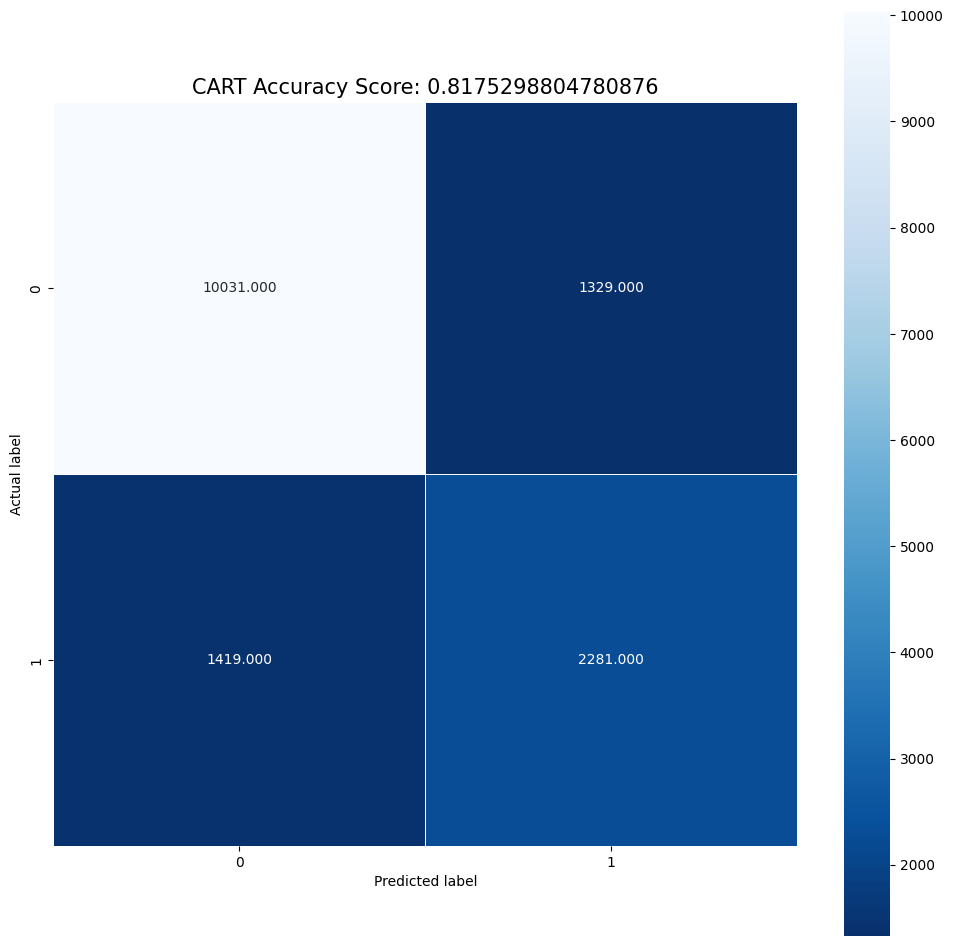

In [ ]:
# Tính toán ma trận nhầm lẫn
cart_cm = metrics.confusion_matrix(y_test, cart_pred)

# Và biểu diễn nó lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(cart_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'CART Accuracy Score: {0}'.format(cart_score)
plt.title(title, size = 15);

print("Võ Thành Hoàng Phúc - 6351071056")

# Câu 9

In [ ]:
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Võ Thành Hoàng Phúc - 6351071056")

Võ Thành Hoàng Phúc - 6351071056


In [ ]:
# Model Accuracy, how often is the classifier correct?
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy:", bayes_score)
print("Report:", metrics.classification_report(y_test, bayes_pred))

print("Võ Thành Hoàng Phúc - 6351071056")

Accuracy: 0.8029216467463479
Report:               precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86     11360
        >50K       0.57      0.82      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060

Võ Thành Hoàng Phúc - 6351071056


Võ Thành Hoàng Phúc - 6351071056


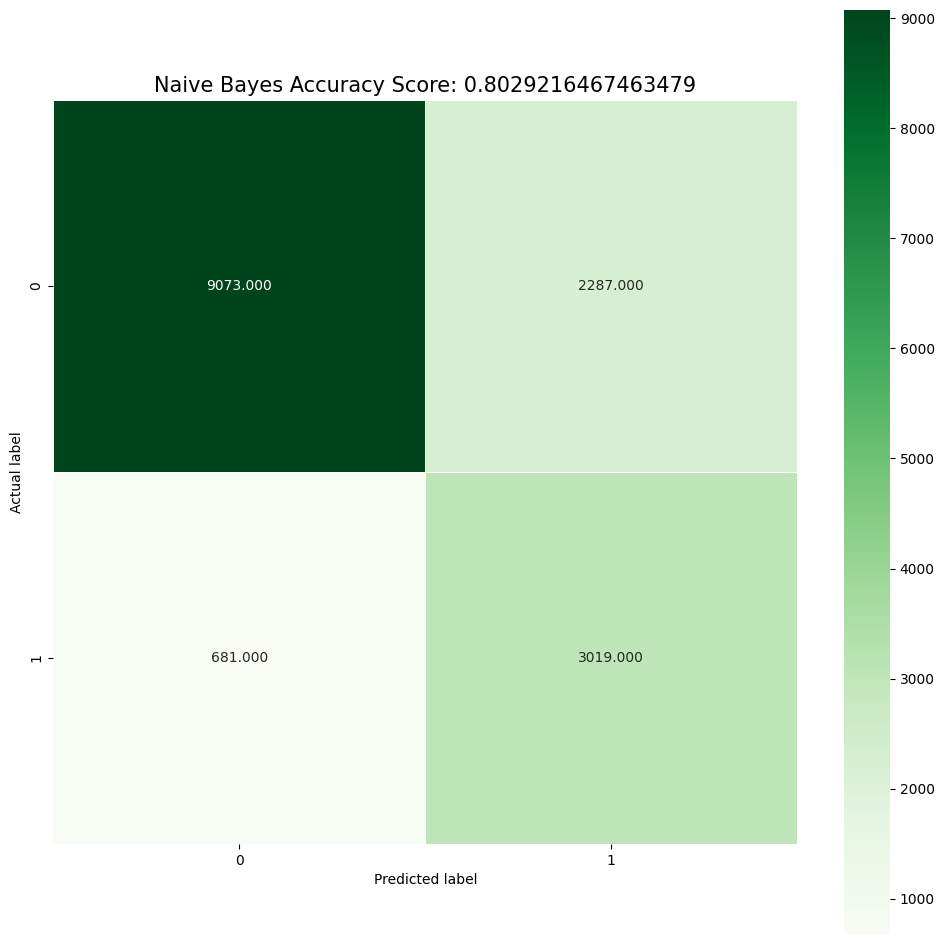

In [ ]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)

plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title, size = 15);

print("Võ Thành Hoàng Phúc - 6351071056")

# Câu 10

- Nhận xét:
  - Cả ba mô hình đều có độ chính xác tổng thể (Accuracy) khá tốt và tương đương nhau, dao động trong khoảng 80% - 82%.

  - Decision Tree (Entropy) có độ chính xác cao nhất (81.75%), nhưng chỉ nhỉnh hơn một chút so với hai mô hình còn lại.

  - Naive Bayes có độ chính xác tổng thể thấp nhất (80.29%).
- So sánh Decision Tree và CART:
  - Hai mô hình này (về cơ bản đều là Cây quyết định, chỉ khác tiêu chí phân chia là "entropy" và "gini") cho kết quả gần như giống hệt nhau.

  - Các chỉ số Precision, Recall, F1-score cho cả hai lớp (<=50K và >50K) của chúng chỉ chênh lệch 0.01 - 0.02.

  - Điều này cho thấy với bộ dữ liệu này, việc chọn tiêu chí entropy hay gini (mặc định của CART) không tạo ra sự khác biệt đáng kể. Cả hai đều dự đoán khá cân bằng.
- Phân tích Naive Bayes:
  - Với lớp <=50K (Lớp đa số):
    - Nó có Precision cực cao (0.93). Nghĩa là, khi Naive Bayes dự đoán một người có thu nhập <=50K, nó gần như chắc chắn đúng (đúng 93% trường hợp).

    - Tuy nhiên, Recall lại thấp (0.80), thấp hơn cả hai mô hình cây. Nghĩa là nó đã bỏ sót 20% số người có thu nhập <=50K (dự đoán nhầm họ thành >50K).
  - Với lớp >50K (Lớp thiểu số):
    - Đây là điểm mạnh của Naive Bayes: Nó có Recall cao vượt trội (0.82). Trong khi hai mô hình cây chỉ "tìm" được 60-62% số người >50K, Naive Bayes tìm được tới 82%.

    - Hậu quả của việc "cố gắng tìm" này là Precision rất thấp (0.57). Nghĩa là, khi nó dự đoán ai đó >50K, nó đã dự đoán sai tới 43% trường hợp.

    - Tuy nhiên, sự cân bằng giữa Precision (thấp) và Recall (cao) này lại cho ra F1-score (0.67), đây là chỉ số F1 tốt nhất cho lớp >50K trong cả ba mô hình.